In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
df = pd.read_table('GRACE/PAPER/Paper_Data/Hists/FitFRAP_mmh1/params.dat', names = ["a1", "a2","a3","a4","a5","a6","a7","n1","n2","t_half","v_max","mmh1"])
df1 = pd.read_table('GRACE/PAPER/Paper_Data/Hists/FitFRAP_mmh2/params.dat', names = ["a1", "a2","a3","a4","a5","a6","a7","n1","n2","t_half","v_max","mmh2"])
df2 = pd.read_table('GRACE/PAPER/Paper_Data/Hists/FitFRAP_mmh3/params.dat', names = ["a1", "a2","a3","a4","a5","a6","a7","n1","n2","t_half","v_max","mmh3"])


In [218]:
params = pd.concat([df, df1, df2])

In [219]:
params = params.fillna(0)

In [220]:
params.sample(5)

,a1,a2,a3,a4,a5,a6,a7,n1,n2,t_half,v_max,mmh1,mmh2,mmh3
31,0.474952,0.466828,0.661690,7.857617e-01,6.842697e+08,0.018113,0.019021,1.136324,1.034344,16.415374,1.235219,0.0,1.0,0.0
63,0.426928,0.501967,0.772097,6.839128e-01,2.756369e+00,0.010933,0.010530,1.164835,1.053720,14.704780,1.209676,0.0,0.0,1.0
18,0.501726,0.379511,0.753305,7.181636e-01,3.266444e-01,0.023063,0.023456,1.116514,1.062942,17.461905,1.081410,0.0,0.0,1.0
106,0.686707,0.598796,0.778319,3.086798e+03,1.146386e+22,0.002267,0.000053,1.045891,1.007896,11.972061,1.148803,1.0,0.0,0.0
29,0.695087,0.704099,1.119019,2.582321e+12,5.583913e+11,0.021714,0.023583,1.041278,1.082155,11.925799,1.252227,0.0,1.0,0.0


In [221]:
params["mmh1"] = params["mmh1"]+2*params["mmh2"]+3*params["mmh3"]
params = params[params.columns[0:12]]
params["mmh1"] = params["mmh1"].astype(int)

In [222]:
params.sample(5)

,a1,a2,a3,a4,a5,a6,a7,n1,n2,t_half,v_max,mmh1
35,0.522714,0.453167,0.577869,9.385655e-01,8.386362e+11,0.003159,9.802340e-04,1.110488,0.994063,15.893202,1.181653,1
14,0.721986,0.594853,0.783344,8.768015e+08,1.413831e+10,0.002434,6.244386e-13,1.028912,1.009638,12.192471,1.166958,1
10,0.614127,0.660885,1.092163,9.418424e-01,1.840926e+00,0.005499,3.718555e-03,1.058825,1.082813,11.248224,1.171717,1
2,0.692825,0.486679,0.809704,1.070455e+01,4.343810e+00,0.013507,1.401492e-02,1.040501,1.086173,16.158900,1.251619,2
59,0.479840,0.639601,1.763965,5.637973e-01,6.240097e-01,0.006971,5.316720e-03,1.118968,1.236642,12.785694,1.282307,3


In [223]:
params['n1-n2'] = params ['n1'] - params['n2']

In [224]:
params.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 0 to 63
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      290 non-null    float64
 1   a2      290 non-null    float64
 2   a3      290 non-null    float64
 3   a4      290 non-null    float64
 4   a5      290 non-null    float64
 5   a6      290 non-null    float64
 6   a7      290 non-null    float64
 7   n1      290 non-null    float64
 8   n2      290 non-null    float64
 9   t_half  290 non-null    float64
 10  v_max   290 non-null    float64
 11  mmh1    290 non-null    int32  
 12  n1-n2   290 non-null    float64
dtypes: float64(12), int32(1)
memory usage: 30.6 KB


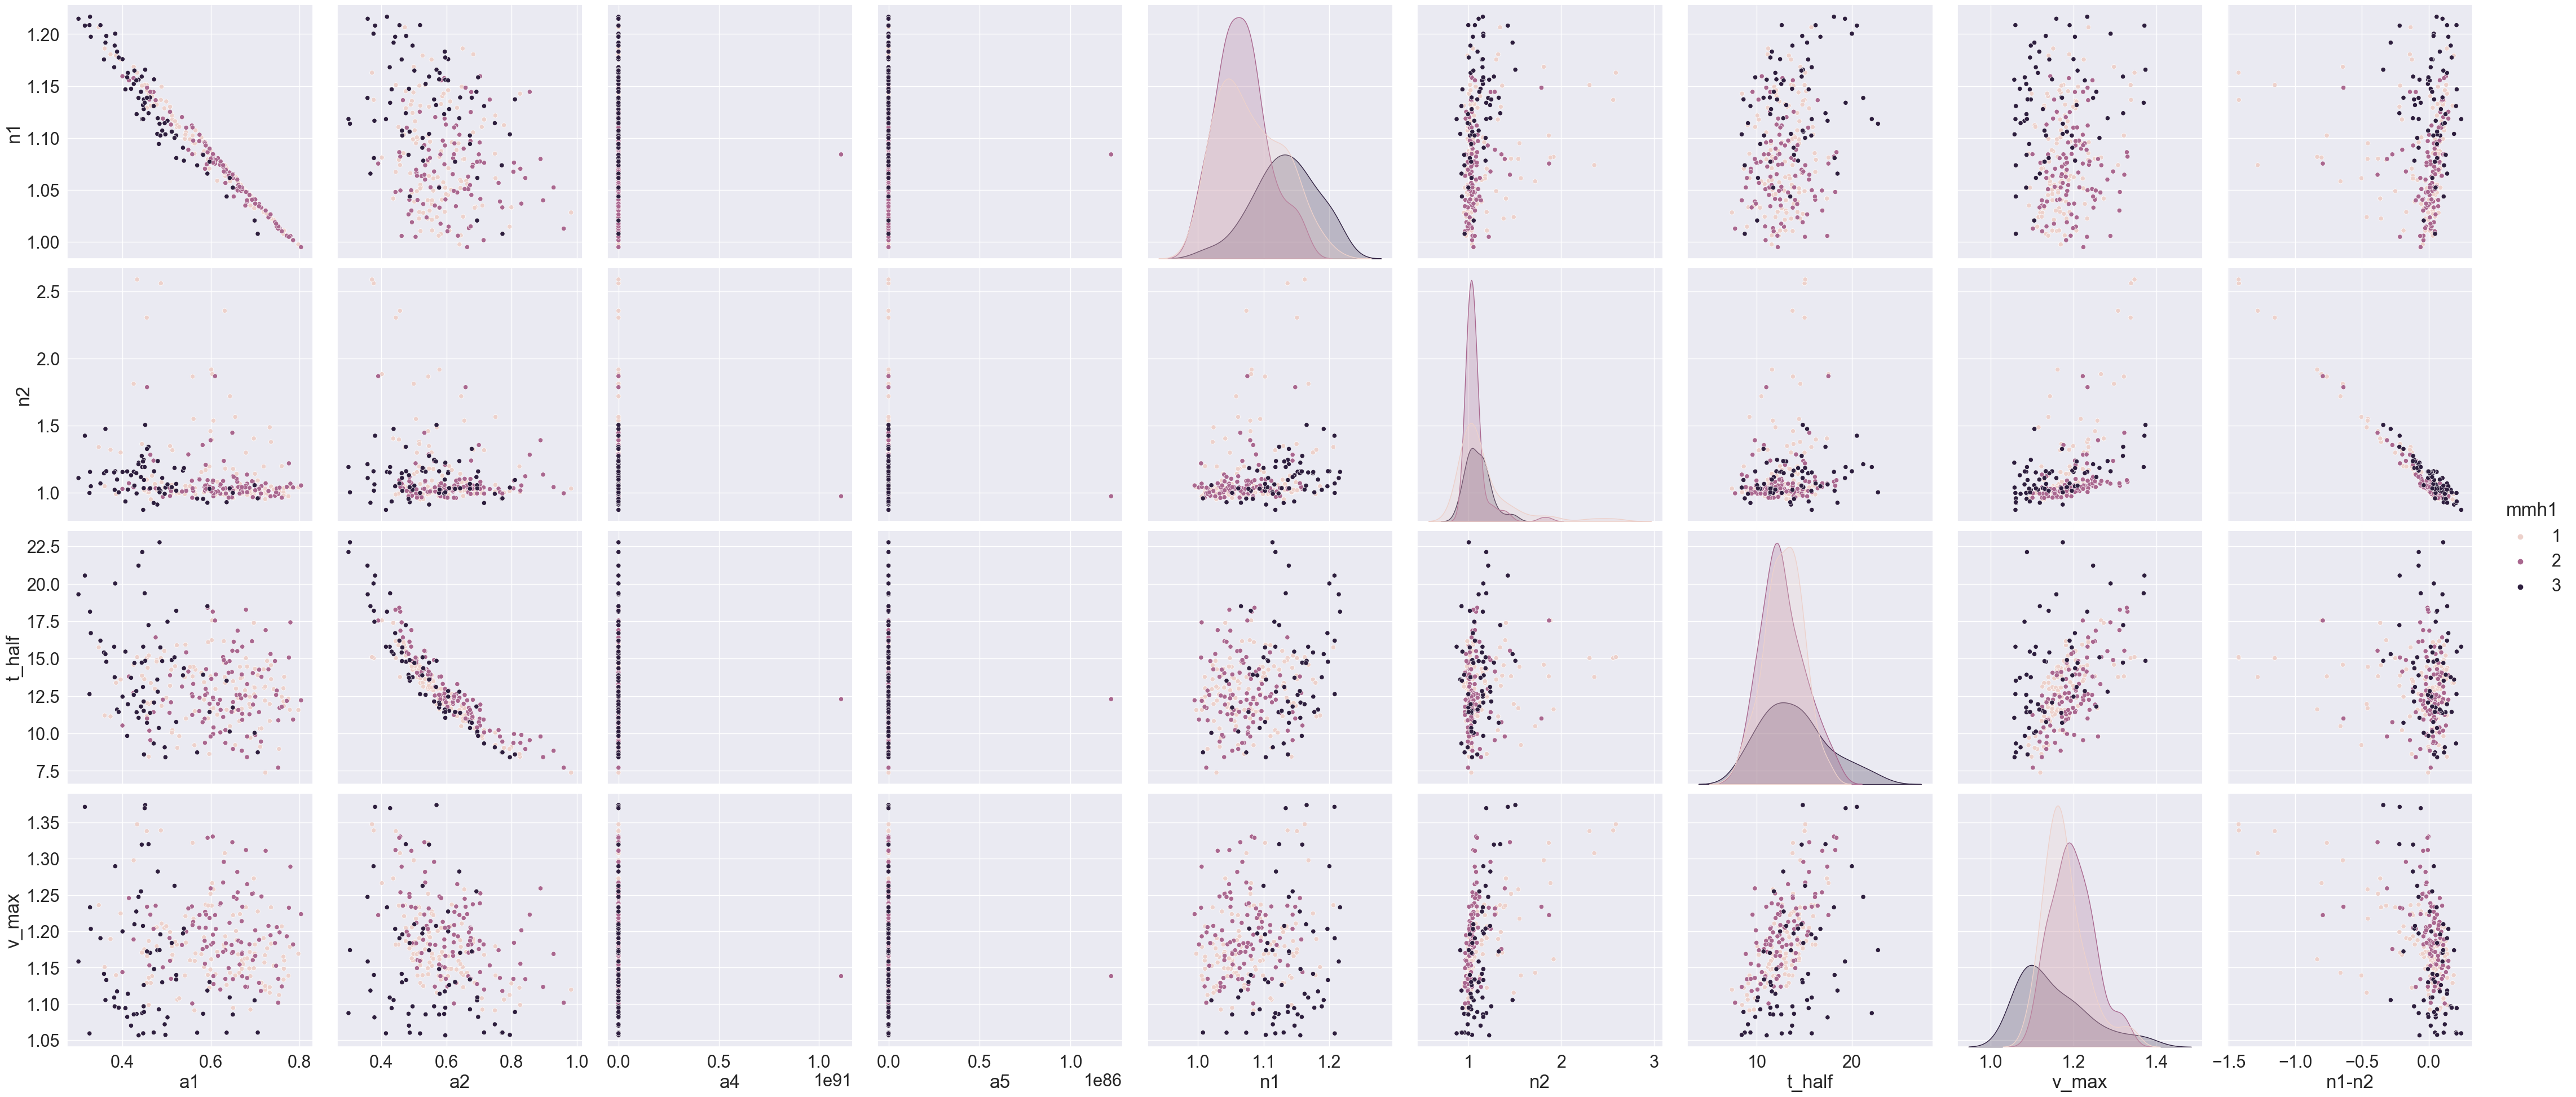

In [225]:
sns.pairplot(params, ## put the data frame here
                y_vars = ["n1","n2","t_half","v_max"], ## put a list of the desired vertical variables here
                x_vars = ["a1","a2","a4","a5","n1","n2","t_half","v_max","n1-n2"], ## put a list of the desired horizontal variables here
                height = 5,
                hue="mmh1")

plt.show()

In [226]:
##count the number of each mmh1 type
params['mmh1'].value_counts()

2    114
1    112
3     64
Name: mmh1, dtype: int64

In [227]:
params['a4_log'] = params['a4'].apply(np.log10)
params['a5_log'] = params['a5'].apply(np.log10)

In [233]:
params_trimmed = params[params['a4'] <100]
params_trimmed = params_trimmed[params_trimmed['a5'] <100]

In [234]:
params_trimmed.sample(5)

,a1,a2,a3,a4,a5,a6,a7,n1,n2,t_half,v_max,mmh1,n1-n2,a4_log,a5_log
22,0.649471,0.577790,0.817842,2.461975,0.825803,0.037108,4.203524e-02,1.052137,0.999607,11.731007,1.085348,3,0.052530,0.391284,-0.083124
78,0.596088,0.823805,2.071897,1.043347,0.491610,0.002935,5.947769e-04,1.070468,1.196763,8.626189,1.122252,1,-0.126295,0.018429,-0.308380
37,0.664148,0.663380,0.882425,19.859706,13.804902,0.002298,5.150141e-15,1.055680,1.016341,10.818834,1.142898,1,0.039340,1.297973,1.140033
33,0.586393,0.826758,1.087958,0.767659,93.978940,0.006146,4.414492e-03,1.070349,1.016942,9.372794,1.155343,2,0.053406,-0.114832,1.973031
70,0.462960,0.855398,2.826795,0.789856,0.412897,0.002132,6.495941e-05,1.144339,1.284010,9.549495,1.222980,2,-0.139671,-0.102452,-0.384158


In [235]:
params_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 63
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      143 non-null    float64
 1   a2      143 non-null    float64
 2   a3      143 non-null    float64
 3   a4      143 non-null    float64
 4   a5      143 non-null    float64
 5   a6      143 non-null    float64
 6   a7      143 non-null    float64
 7   n1      143 non-null    float64
 8   n2      143 non-null    float64
 9   t_half  143 non-null    float64
 10  v_max   143 non-null    float64
 11  mmh1    143 non-null    int32  
 12  n1-n2   143 non-null    float64
 13  a4_log  143 non-null    float64
 14  a5_log  143 non-null    float64
dtypes: float64(14), int32(1)
memory usage: 17.3 KB


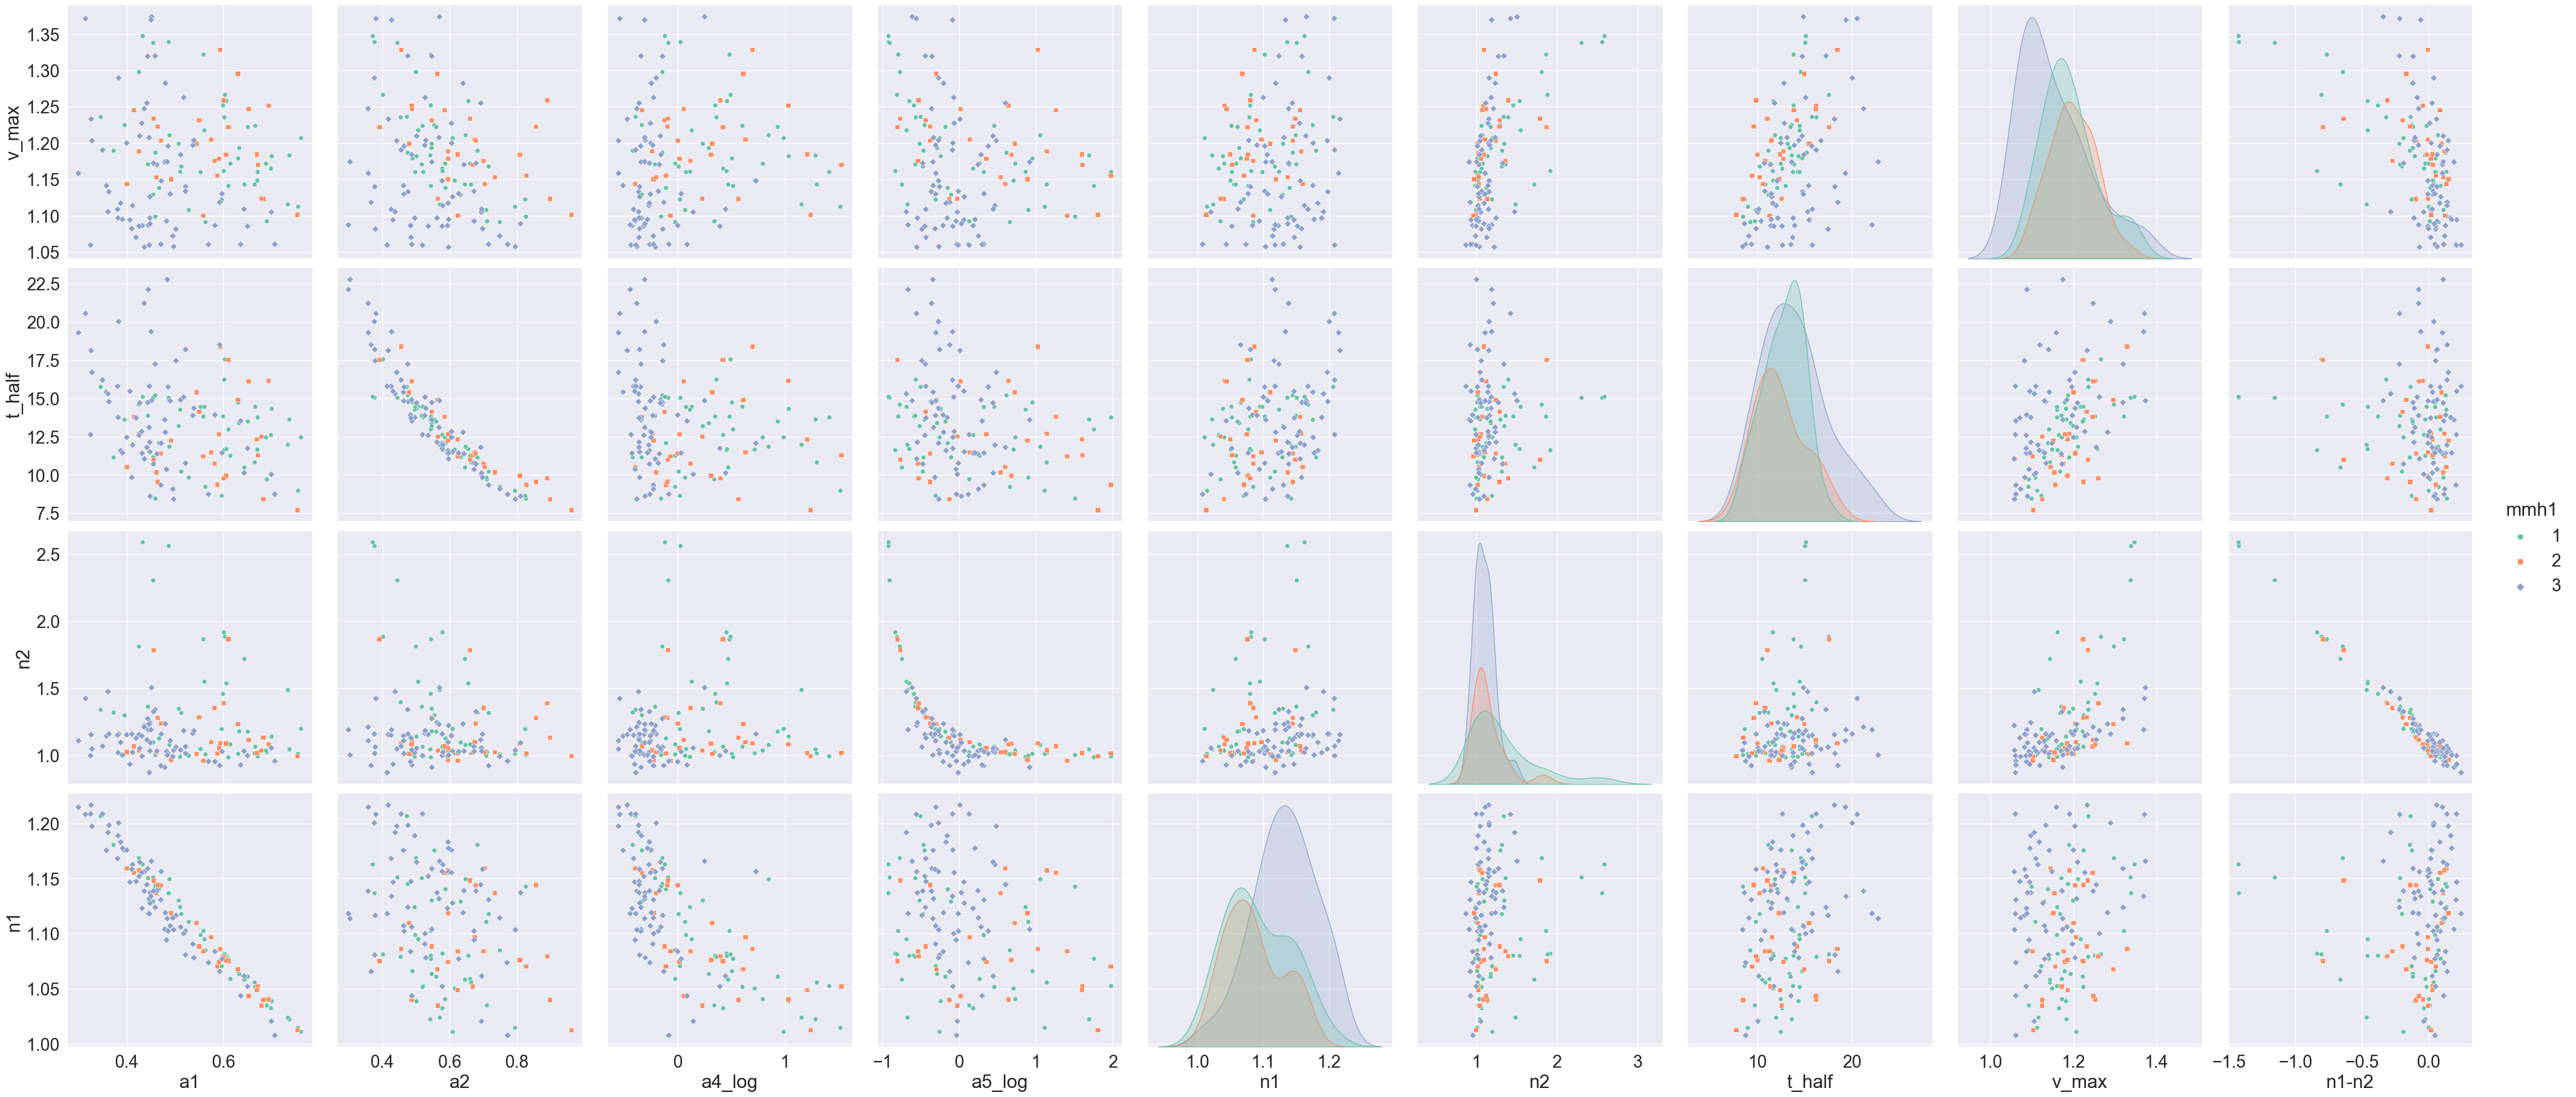

In [236]:
sns.pairplot(params_trimmed, ## put the data frame here
                y_vars = ["v_max","t_half","n2","n1"], ## put a list of the desired vertical variables here
                x_vars = ["a1","a2","a4_log","a5_log","n1","n2","t_half","v_max","n1-n2"], ## put a list of the desired horizontal variables here
                height = 5,
                hue="mmh1", palette="Set2",
                markers=["o", "s", "D"])
sns.set(font_scale=2)
plt.show()